# Reader 클래스 활용
surprise 방식으로 데이터 컬럼명 적용

In [15]:
import pandas as pd
from surprise import KNNBasic,accuracy,Dataset
from surprise.model_selection import train_test_split

In [7]:
rat=pd.read_csv('F:/Data/ratings.csv')
rat

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
rat.to_csv('F:/Data/rats.csv',header=False,index=False)

불러온 데이터를 인덱스와 컬럼명을 제거하고 저장한 후 결과

In [9]:
pd.read_csv('F:Data/rats.csv')

,1,1.1,4.0,964982703
0,1,3,4.0,964981247
1,1,6,4.0,964982224
2,1,47,5.0,964983815
3,1,50,5.0,964982931
4,1,70,3.0,964982400
...,...,...,...,...
100830,610,166534,4.0,1493848402
100831,610,168248,5.0,1493850091
100832,610,168250,5.0,1494273047
100833,610,168252,5.0,1493846352


Reader 클래스를 활용해 컬럼명 적용

In [10]:
from surprise import Reader

line_foramt : 컬럼 순서대로 나열(공백으로 분리하여 컬럼 인식)  
sep : 컬럼을 나누는 분리자 디폴트='\t'  
rating_scale : 최소평점과 최고평점 설정. 디폴트=(1,5)

In [11]:
reader=Reader(line_format='user item rating timestamp',sep=',',rating_scale=(0.5,5))

## 최종 데이터 불러오기

In [17]:
dt=Dataset.load_from_file('F:/Data/rats.csv',reader=reader)

## 데이터 분할

In [18]:
tr,te=train_test_split(dt,test_size=0.25,random_state=1234)

## 데이터 학습 및 예측 평가(KNN 알고리즘 적용)

In [22]:
K_rec=KNNBasic()

In [23]:
K_rec.fit(tr)
pred_K=K_rec.test(te)

Computing the msd similarity matrix...
Done computing similarity matrix.


KNN의 예측성능

In [24]:
accuracy.rmse(pred_K)

RMSE: 0.9509


0.9508965855490089

### SVD와 비교
두 모델 모두 파라미터 변환없이 디폴트값의 기본모델일 때, 해당 데이터에서는 KNN의 성능이 좋게 나타남

SVD의 예측성능

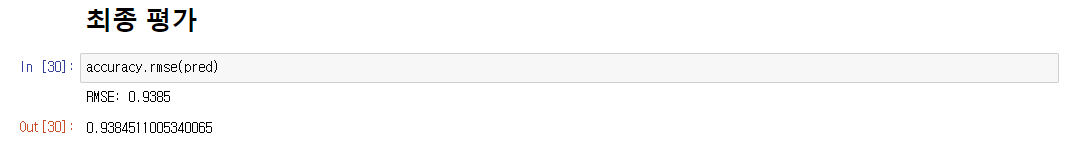